In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Import data and convert it to csv

acq_data = pd.read_excel(r"C:\Users\asyar\OneDrive\Desktop\Foundations4 Final Project\FC_data.xlsx", sheet_name = 'acq')
#print(acq_data)

ret_data = pd.read_excel(r"C:\Users\asyar\OneDrive\Desktop\Foundations4 Final Project\FC_data.xlsx", sheet_name = 'ret')
print(ret_data)

ext1_data = pd.read_excel(r"C:\Users\asyar\OneDrive\Desktop\Foundations4 Final Project\FC_data.xlsx", sheet_name = 'ext1')
#print(ext1_data)

ext2_data = pd.read_excel(r"C:\Users\asyar\OneDrive\Desktop\Foundations4 Final Project\FC_data.xlsx", sheet_name = 'ext2')
#print(ext2_data)

renewal_data = pd.read_excel(r"C:\Users\asyar\OneDrive\Desktop\Foundations4 Final Project\FC_data.xlsx", sheet_name = 'renewal')
#print(renewal_data)

      groups    cue
0   avehicle   92.4
1   avehicle   95.8
2   avehicle   30.6
3   avehicle   98.6
4   avehicle   95.8
5   avehicle   79.0
6   avehicle   44.0
7    ket-acq   93.6
8    ket-acq   96.0
9    ket-acq   67.0
10   ket-acq   99.4
11   ket-acq  100.0
12   ket-acq   40.8
13   ket-acq   91.0
14   ket-ret   56.4
15   ket-ret  100.0
16   ket-ret   91.6
17   ket-ret   45.4
18   ket-ret  100.0
19   ket-ret   92.4
20   ket-ret   94.6
21   ket-ext   99.4
22   ket-ext   92.2
23   ket-ext   96.8
24   ket-ext   91.4
25   ket-ext   99.2
26   ket-ext   82.2
27   ket-ext   63.2


In [71]:
#convert it to TALL data structure
acq_tall = acq_data.melt(
    id_vars=["groups"],
    value_vars=["cue1", "cue2", "cue3", "cue4", "cue5"],
    var_name="Cues",
    value_name="Freezing"
)

print(acq_tall)

ext1_tall = ext1_data.melt(
    id_vars=["groups"],
    value_vars=["cue1", "cue2", "cue3", "cue4", "cue5", "cue6", "cue7", "cue8", "cue9", "cue10",
                "cue11", "cue12", "cue13", "cue14", "cue15"],
    var_name="Cues",
    value_name="Freezing"
)

#print(ext1_tall)

ext2_tall = ext2_data.melt(
    id_vars=["groups"],
    value_vars=["cue1", "cue2", "cue3", "cue4", "cue5", "cue6", "cue7", "cue8", "cue9", "cue10",
                "cue11", "cue12", "cue13", "cue14", "cue15"],
    var_name="Cues",
    value_name="Freezing"
)

#print(ext2_tall)

renewal_tall = renewal_data.melt(
    id_vars=["groups"],
    value_vars=["cue1", "cue2", "cue3"],
    var_name="Cues",
    value_name="Freezing"
)

#print(renewal_tall)

       groups  Cues  Freezing
0    avehicle  cue1      57.2
1    avehicle  cue1       0.0
2    avehicle  cue1      16.8
3    avehicle  cue1      34.0
4    avehicle  cue1       4.2
..        ...   ...       ...
135   ket-ext  cue5      81.4
136   ket-ext  cue5      92.0
137   ket-ext  cue5      67.8
138   ket-ext  cue5      85.6
139   ket-ext  cue5      92.4

[140 rows x 3 columns]


In [73]:
#define functions for plotting the data and runnng a lineer model, followed by an ANOVA
def plotting(data, title="Graph Title", rename_group=None):
    if rename_group:
        data['groups'] = data['groups'].replace(rename_group)
    data_mean = data.groupby("groups").mean()
    data_sem = data.groupby("groups").sem()
    data_mean.T.plot(kind='line', figsize=(10,5), marker ="o", yerr = data_sem.T)
    plt.ylim(0,100)
    plt.xlabel("Cues")
    plt.ylabel("Freezing (%)")
    plt.title(title)
    plt.legend(title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def lineerandanova (data_tall):
    lineer_model = smf.ols(formula='Freezing ~ groups * Cues', data = data_tall).fit()
    anova_lm = sm.stats.anova_lm(lineer_model, type=2)
    print(lineer_model.summary())
    print(anova_lm)


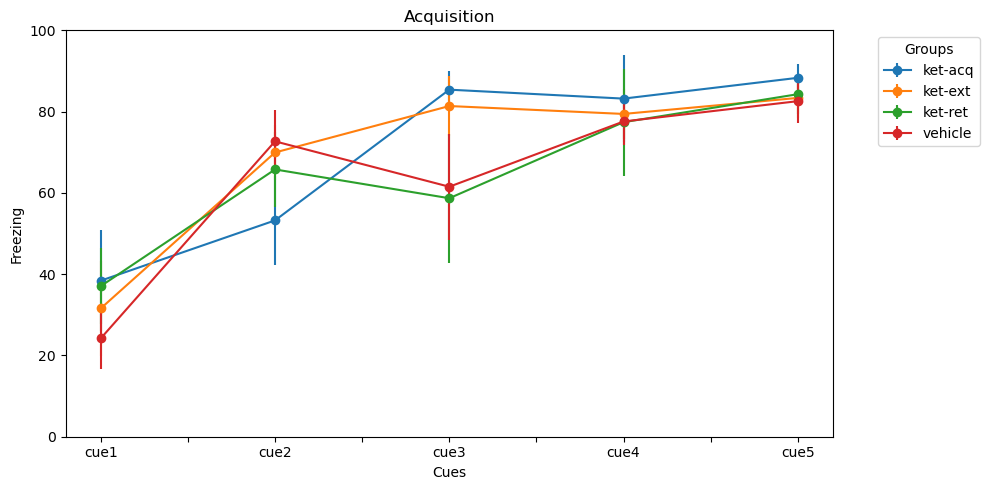

                            OLS Regression Results                            
Dep. Variable:               Freezing   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     4.710
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           5.55e-08
Time:                        10:25:40   Log-Likelihood:                -634.79
No. Observations:                 140   AIC:                             1310.
Df Residuals:                     120   BIC:                             1368.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [75]:
#apply the functions to acquisition data
plotting(acq_data, title ="Acquisition", rename_group = {"avehicle" : "vehicle"})
lineerandanova(acq_tall)

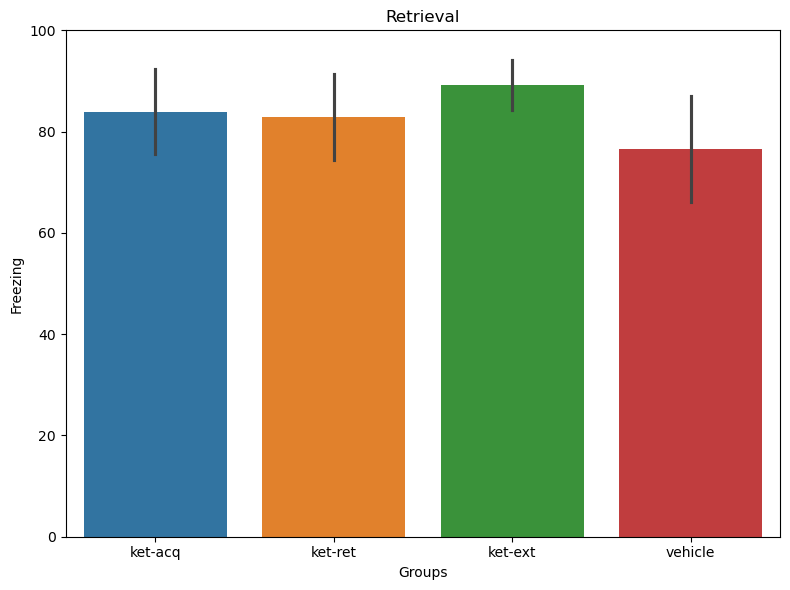

                 sum_sq    df         F    PR(>F)
C(groups)    561.634286   3.0  0.387809  0.762786
Residual   11585.782857  24.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
ket-acq ket-ext   5.2286 0.9699 -27.1691 37.6262  False
ket-acq ket-ret  -1.0571 0.9997 -33.4548 31.3405  False
ket-acq vehicle  -7.3714 0.9221 -39.7691 25.0262  False
ket-ext ket-ret  -6.2857 0.9496 -38.6833 26.1119  False
ket-ext vehicle    -12.6 0.7089 -44.9976 19.7976  False
ket-ret vehicle  -6.3143 0.9489 -38.7119 26.0833  False
-------------------------------------------------------


In [111]:
#since retrieval has only one cue, run an ANOVA and plot as barplots
#Barplot


plt.figure(figsize=(8, 6))
ret_data['groups'] = ret_data['groups'].replace({'avehicle': 'vehicle'})
color_list = {"ket-acq" :"tab:blue", "ket-ret" :"tab:orange", "ket-ext" :"tab:green", "vehicle":"tab:red"}
order_list = ["ket-acq", "ket-ret", "ket-ext", "vehicle"]
sns.barplot(data=ret_data, x="groups", y="cue", errorbar="se", hue = "groups", order = order_list, palette = color_list)
plt.title("Retrieval")
plt.xlabel("Groups")
plt.ylabel("Freezing (%)")
plt.ylim(0,100)
plt.tight_layout()
plt.show()

# ANOVA model and post hocs
retrieval_anova = smf.ols("cue ~ C(groups)", data=ret_data).fit()
retrieval_anova_table = sm.stats.anova_lm(retrieval_anova, typ=2)
print(retrieval_anova_table)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

retrieval_tukey = pairwise_tukeyhsd(endog=ret_data["cue"], groups=ret_data["groups"], alpha=0.05)
print(retrieval_tukey)

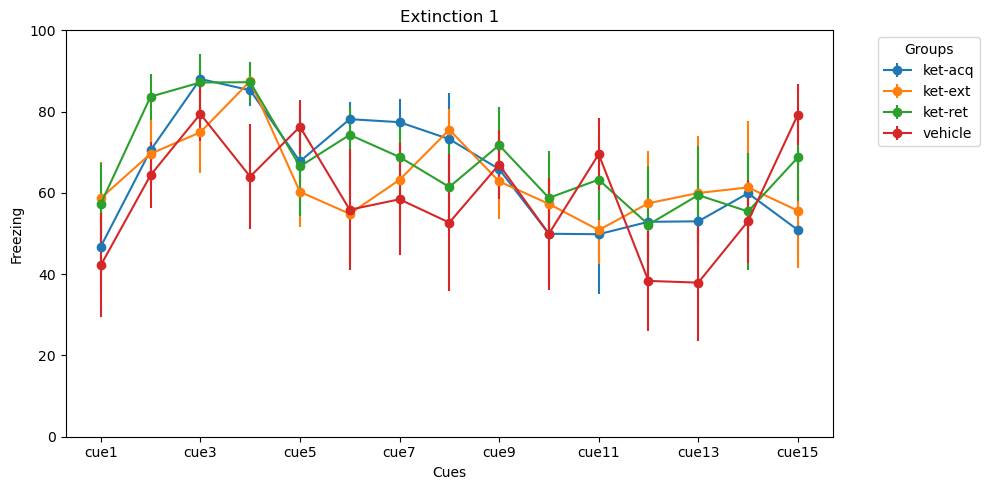

                            OLS Regression Results                            
Dep. Variable:               Freezing   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.354
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0520
Time:                        10:22:46   Log-Likelihood:                -1964.6
No. Observations:                 420   AIC:                             4049.
Df Residuals:                     360   BIC:                             4292.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [55]:
#apply functions to extinction 1 data
plotting(ext1_data, title= "Extinction 1", rename_group = {"avehicle" : "vehicle"})
lineerandanova(ext1_tall)

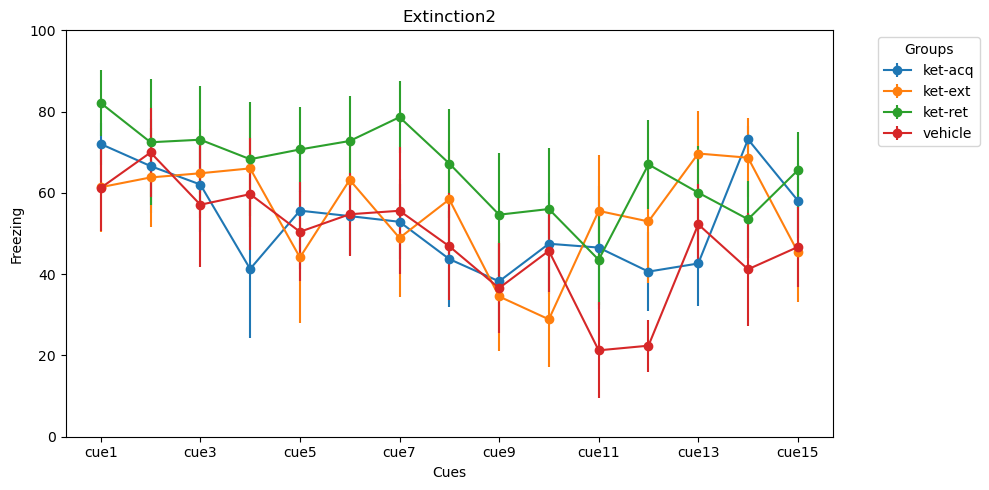

                            OLS Regression Results                            
Dep. Variable:               Freezing   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.240
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.123
Time:                        10:22:52   Log-Likelihood:                -2016.3
No. Observations:                 420   AIC:                             4153.
Df Residuals:                     360   BIC:                             4395.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [57]:
#apply functions to extinction 2 data
plotting(ext2_data, title = "Extinction2", rename_group = {"avehicle" : "vehicle"})
lineerandanova(ext2_tall)

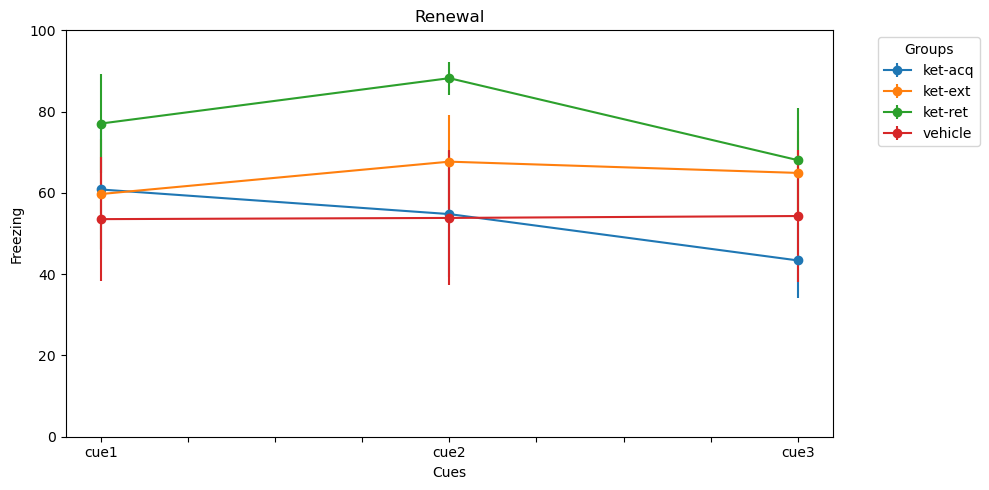

                            OLS Regression Results                            
Dep. Variable:               Freezing   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.8362
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.605
Time:                        10:22:56   Log-Likelihood:                -410.96
No. Observations:                  84   AIC:                             845.9
Df Residuals:                      72   BIC:                             875.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [59]:
#apply functions to renewal data
plotting(renewal_data, title = "Renewal", rename_group = {"avehicle" : "vehicle"})
lineerandanova(renewal_tall)